In [1]:
import pandas as pd

# df = pd.read_parquet("initial_samples.parquet")
df = pd.read_parquet("active_labeled.parquet")
df

,filepath,label
0,data/imagenette/2/00710.jpg,cassette player
1,data/imagenette/2/00063.jpg,cassette player
2,data/imagenette/2/00506.jpg,cassette player
3,data/imagenette/2/00575.jpg,cassette player
4,data/imagenette/2/00136.jpg,cassette player
...,...,...
270,data/imagenette/3/02578.jpg,chain saw
271,data/imagenette/6/07713.jpg,garbage truck
272,data/imagenette/6/07672.jpg,garbage truck
273,data/imagenette/8/07255.jpg,golf ball


In [2]:
from active_vision import ActiveLearner
from fastai.vision.models.all import resnet18

al = ActiveLearner(resnet18)

2025-01-13 15:29:35.315 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, filepath_col="filepath", label_col="label")

2025-01-13 15:29:36.123 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-13 15:29:36.124 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-13 15:29:36.489 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-13 15:29:36.619 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00710.jpg,cassette player
1,data/imagenette/2/00063.jpg,cassette player
2,data/imagenette/2/00506.jpg,cassette player
3,data/imagenette/2/00575.jpg,cassette player
4,data/imagenette/2/00136.jpg,cassette player
...,...,...
270,data/imagenette/3/02578.jpg,chain saw
271,data/imagenette/6/07713.jpg,garbage truck
272,data/imagenette/6/07672.jpg,garbage truck
273,data/imagenette/8/07255.jpg,golf ball


2025-01-13 15:29:36.791 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-13 15:29:43.895 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.001737800776027143


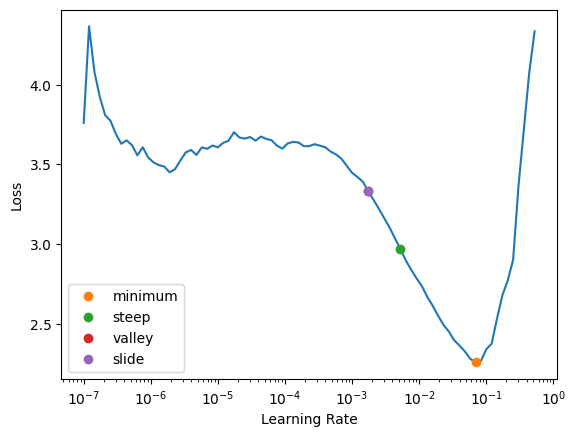

In [5]:
al.lr_find()

2025-01-13 15:29:45.468 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.127271,1.446365,0.436364,00:01


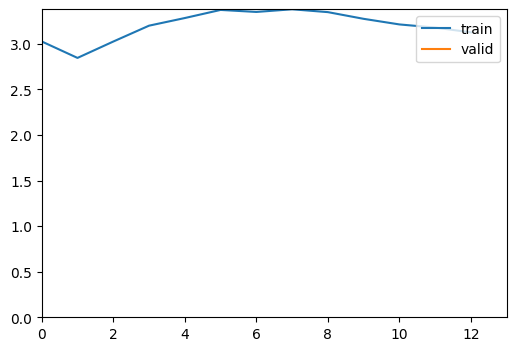

epoch,train_loss,valid_loss,accuracy,time
0,1.949262,1.135409,0.654545,00:01
1,1.597486,0.874778,0.727273,00:01
2,1.295250,0.805245,0.745455,00:01


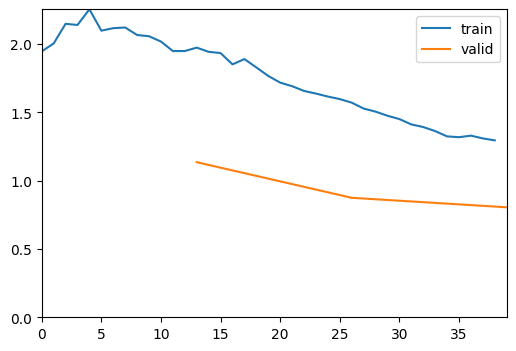

In [6]:
al.train(epochs=3, lr=1e-3)

## Evaluate the model on a *labeled* evaluation set

In [7]:
test_df = pd.read_parquet("evaluation_samples.parquet")
# test_df = test_df.rename(columns={"label_name": "label"})
al.evaluate(test_df, filepath_col="filepath", label_col="label")


2025-01-13 15:29:58.557 | INFO     | active_vision.core:evaluate:112 - Accuracy: 93.40%


0.9340127388535032

## Get the predictions from an *unlabeled* set

In [8]:
df = pd.read_parquet("unlabeled_samples.parquet")
filepaths = df["filepath"].tolist()

filepaths

['data/imagenette/2/00000.jpg',
 'data/imagenette/2/00001.jpg',
 'data/imagenette/2/00002.jpg',
 'data/imagenette/2/00004.jpg',
 'data/imagenette/2/00005.jpg',
 'data/imagenette/2/00006.jpg',
 'data/imagenette/2/00007.jpg',
 'data/imagenette/2/00008.jpg',
 'data/imagenette/2/00009.jpg',
 'data/imagenette/2/00010.jpg',
 'data/imagenette/2/00011.jpg',
 'data/imagenette/2/00012.jpg',
 'data/imagenette/2/00013.jpg',
 'data/imagenette/2/00014.jpg',
 'data/imagenette/2/00015.jpg',
 'data/imagenette/2/00016.jpg',
 'data/imagenette/2/00017.jpg',
 'data/imagenette/2/00018.jpg',
 'data/imagenette/2/00019.jpg',
 'data/imagenette/2/00020.jpg',
 'data/imagenette/2/00021.jpg',
 'data/imagenette/2/00022.jpg',
 'data/imagenette/2/00023.jpg',
 'data/imagenette/2/00024.jpg',
 'data/imagenette/2/00025.jpg',
 'data/imagenette/2/00026.jpg',
 'data/imagenette/2/00027.jpg',
 'data/imagenette/2/00028.jpg',
 'data/imagenette/2/00029.jpg',
 'data/imagenette/2/00030.jpg',
 'data/imagenette/2/00031.jpg',
 'data/i

In [9]:
len(filepaths)

9369

In [10]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df

2025-01-13 15:30:02.962 | INFO     | active_vision.core:predict:77 - Running inference on 9369 samples


,filepath,pred_label,pred_conf
0,data/imagenette/2/00000.jpg,cassette player,0.220948
1,data/imagenette/2/00001.jpg,cassette player,0.227241
2,data/imagenette/2/00002.jpg,cassette player,0.208374
3,data/imagenette/2/00004.jpg,cassette player,0.228580
4,data/imagenette/2/00005.jpg,cassette player,0.134166
...,...,...,...
9364,data/imagenette/5/09464.jpg,French horn,0.219891
9365,data/imagenette/5/09465.jpg,French horn,0.231822
9366,data/imagenette/5/09466.jpg,French horn,0.231926
9367,data/imagenette/5/09467.jpg,French horn,0.226841


In [11]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=30)
uncertain_df

2025-01-13 15:30:11.552 | INFO     | active_vision.core:sample_uncertain:119 - Getting top 30 low confidence samples


,filepath,pred_label,pred_conf
1215,data/imagenette/0/01228.jpg,English springer,0.107802
1970,data/imagenette/3/01991.jpg,French horn,0.108339
7657,data/imagenette/6/07739.jpg,chain saw,0.110674
7257,data/imagenette/8/07335.jpg,parachute,0.110774
5385,data/imagenette/7/05443.jpg,tench,0.111138
4898,data/imagenette/7/04950.jpg,garbage truck,0.111410
7857,data/imagenette/6/07944.jpg,church,0.112245
9194,data/imagenette/5/09291.jpg,garbage truck,0.112378
7048,data/imagenette/8/07125.jpg,French horn,0.112463
5366,data/imagenette/7/05424.jpg,cassette player,0.112498


## Label the uncertain samples

In [ ]:
al.label(uncertain_df, output_filename="uncertain")

In [ ]:
labeled_df = pd.read_parquet("uncertain.parquet")

labeled_df


In [ ]:
al.add_to_train_set(labeled_df, output_filename="active_labeled")